# Data Analysis with Python using Forbes 2022 Dataset

In this notebook, I'm going to talk about data analysis with Python.
</br>
Happy learning

## Loading Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./Data/forbes_2022_billionaires.csv")

In [3]:
df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [4]:
df.shape

(2668, 22)

In [5]:
df.columns

Index(['rank', 'personName', 'age', 'finalWorth', 'year', 'month', 'category',
       'source', 'country', 'state', 'city', 'countryOfCitizenship',
       'organization', 'selfMade', 'gender', 'birthDate', 'title',
       'philanthropyScore', 'residenceMsa', 'numberOfSiblings', 'bio',
       'about'],
      dtype='object')

## Data Preprocessing

In [6]:
df = df.loc[:,["rank","personName","age","finalWorth","category","country","gender"]]

In [7]:
df.head()

,rank,personName,age,finalWorth,category,country,gender
0,1,Elon Musk,50.0,219000.0,Automotive,United States,M
1,2,Jeff Bezos,58.0,171000.0,Technology,United States,M
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
3,4,Bill Gates,66.0,129000.0,Technology,United States,M
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


In [8]:
df=df.rename(columns={"rank":"Ranking","personName":"Nombre","age":"Edad",
                      "finalWorth":"Valor","category":"Categoria",
                       "country":"Pais", "gender":"Genero"})

In [9]:
df.head()

,Ranking,Nombre,Edad,Valor,Categoria,Pais,Genero
0,1,Elon Musk,50.0,219000.0,Automotive,United States,M
1,2,Jeff Bezos,58.0,171000.0,Technology,United States,M
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
3,4,Bill Gates,66.0,129000.0,Technology,United States,M
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


In [11]:
df = df.set_index("Ranking")

In [12]:
df.head()

,Nombre,Edad,Valor,Categoria,Pais,Genero
Ranking,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M
2,Jeff Bezos,58.0,171000.0,Technology,United States,M
3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
4,Bill Gates,66.0,129000.0,Technology,United States,M
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


In [13]:
df.dtypes

Nombre        object
Edad         float64
Valor        float64
Categoria     object
Pais          object
Genero        object
dtype: object

In [14]:
df.isnull().sum()

Nombre        0
Edad         86
Valor         0
Categoria     0
Pais         13
Genero       16
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(2568, 6)

## Informations about gender of the richest in the world

In [17]:
df["Categoria"].value_counts()

Categoria
Finance & Investments         381
Technology                    332
Manufacturing                 319
Fashion & Retail              238
Healthcare                    209
Food & Beverage               193
Real Estate                   187
Diversified                   174
Media & Entertainment          95
Energy                         93
Automotive                     66
Metals & Mining                65
Service                        52
Construction & Engineering     45
Telecom                        37
Logistics                      32
Sports                         27
Gambling & Casinos             23
Name: count, dtype: int64

In [18]:
df["Categoria"].value_counts(normalize=True)

Categoria
Finance & Investments         0.148364
Technology                    0.129283
Manufacturing                 0.124221
Fashion & Retail              0.092679
Healthcare                    0.081386
Food & Beverage               0.075156
Real Estate                   0.072819
Diversified                   0.067757
Media & Entertainment         0.036994
Energy                        0.036215
Automotive                    0.025701
Metals & Mining               0.025312
Service                       0.020249
Construction & Engineering    0.017523
Telecom                       0.014408
Logistics                     0.012461
Sports                        0.010514
Gambling & Casinos            0.008956
Name: proportion, dtype: float64

In [20]:
df[df["Pais"]=="Turkey"].Pais.value_counts(normalize=True)

Pais
Turkey    1.0
Name: proportion, dtype: float64

In [21]:
df["Pais"].unique()

array(['United States', 'France', 'India', 'Mexico', 'China', 'Singapore',
       'Spain', 'Canada', 'Germany', 'Switzerland', 'Belgium',
       'Hong Kong', 'United Kingdom', 'Australia', 'Austria', 'Italy',
       'Japan', 'Bahamas', 'Indonesia', 'Chile', 'Russia', 'Sweden',
       'Czechia', 'Monaco', 'United Arab Emirates', 'Nigeria', 'Denmark',
       'Thailand', 'Malaysia', 'Brazil', 'Colombia', 'New Zealand',
       'South Korea', 'South Africa', 'Philippines', 'Egypt', 'Taiwan',
       'Israel', 'Vietnam', 'Poland', 'Norway', 'Cayman Islands',
       'Netherlands', 'Eswatini (Swaziland)', 'Peru', 'Algeria',
       'Kazakhstan', 'Georgia', 'Portugal', 'British Virgin Islands',
       'Turkey', 'Finland', 'Ukraine', 'Ireland', 'Bermuda', 'Lebanon',
       'Argentina', 'Cambodia', 'Oman', 'Guernsey', 'Liechtenstein',
       'Turks and Caicos Islands', 'Qatar', 'Morocco', 'Uruguay',
       'Slovakia', 'Romania', 'Nepal', 'Tanzania', 'Bahrain', 'Greece',
       'Hungary', 'Andorra']

In [23]:
df[df["Pais"]=="Canada"].Pais.value_counts(normalize=True)

Pais
Canada    1.0
Name: proportion, dtype: float64

In [31]:
df_genero = df.groupby(["Genero"])

In [32]:
df_genero["Valor"].mean()

Genero
F    4847.902098
M    4790.030675
Name: Valor, dtype: float64

In [34]:
pip install seaborn

In [35]:
import seaborn as sns
sns.set_theme()
sns.set(rc = {"figure.dpi":300})
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='Genero'>

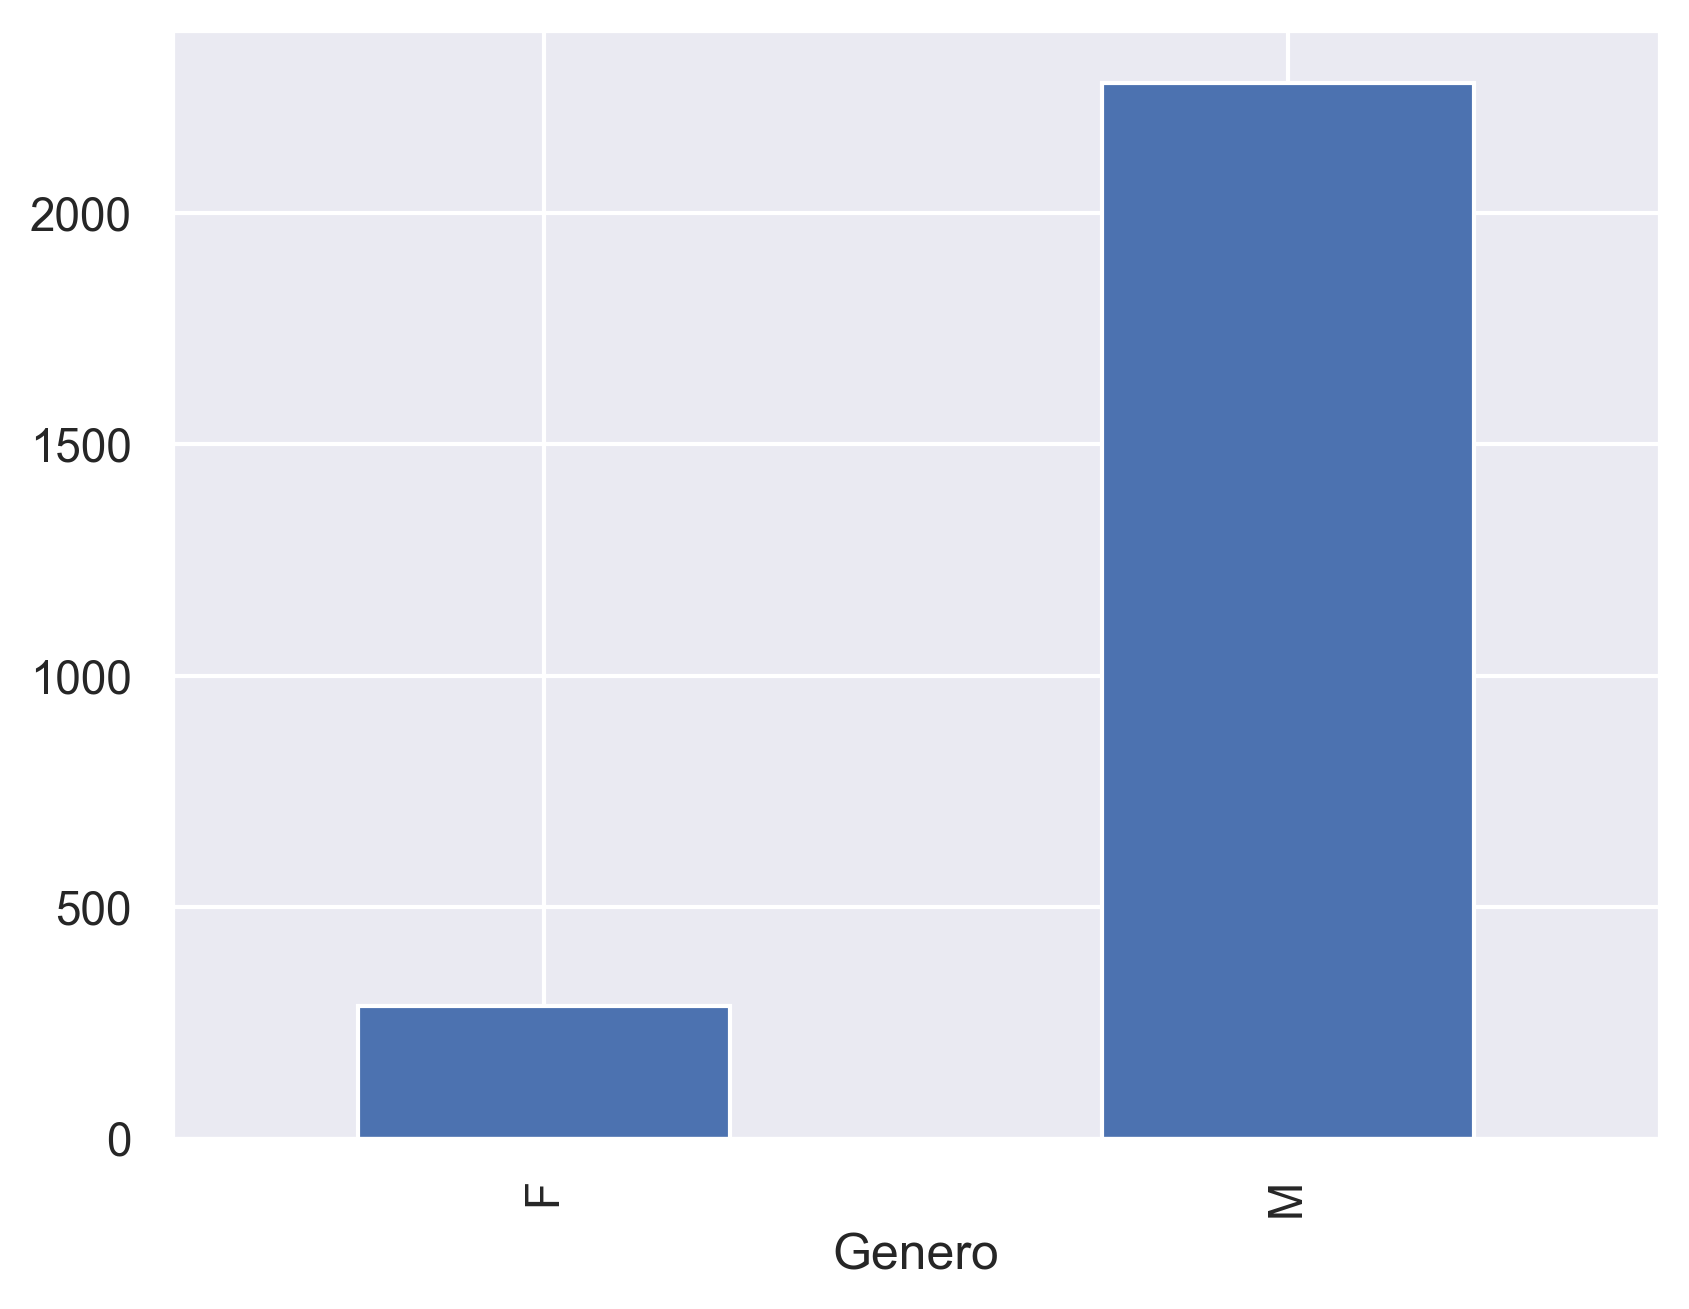

In [36]:
df_genero.size().plot(kind = "bar")

## Which country has the highest number of billionaires?

In [40]:
len(df["Pais"].unique())

73

In [41]:
df_ulke = df.groupby("Pais")

In [42]:
df_ulke_sayi = pd.DataFrame(df_ulke.size().sort_values(ascending=False), 
                           columns = ["Pais"])

In [43]:
df_ulke_sayi.head()

,Pais
Pais,
United States,742
China,546
India,154
Germany,94
United Kingdom,81


<Axes: xlabel='Pais', ylabel='Pais'>

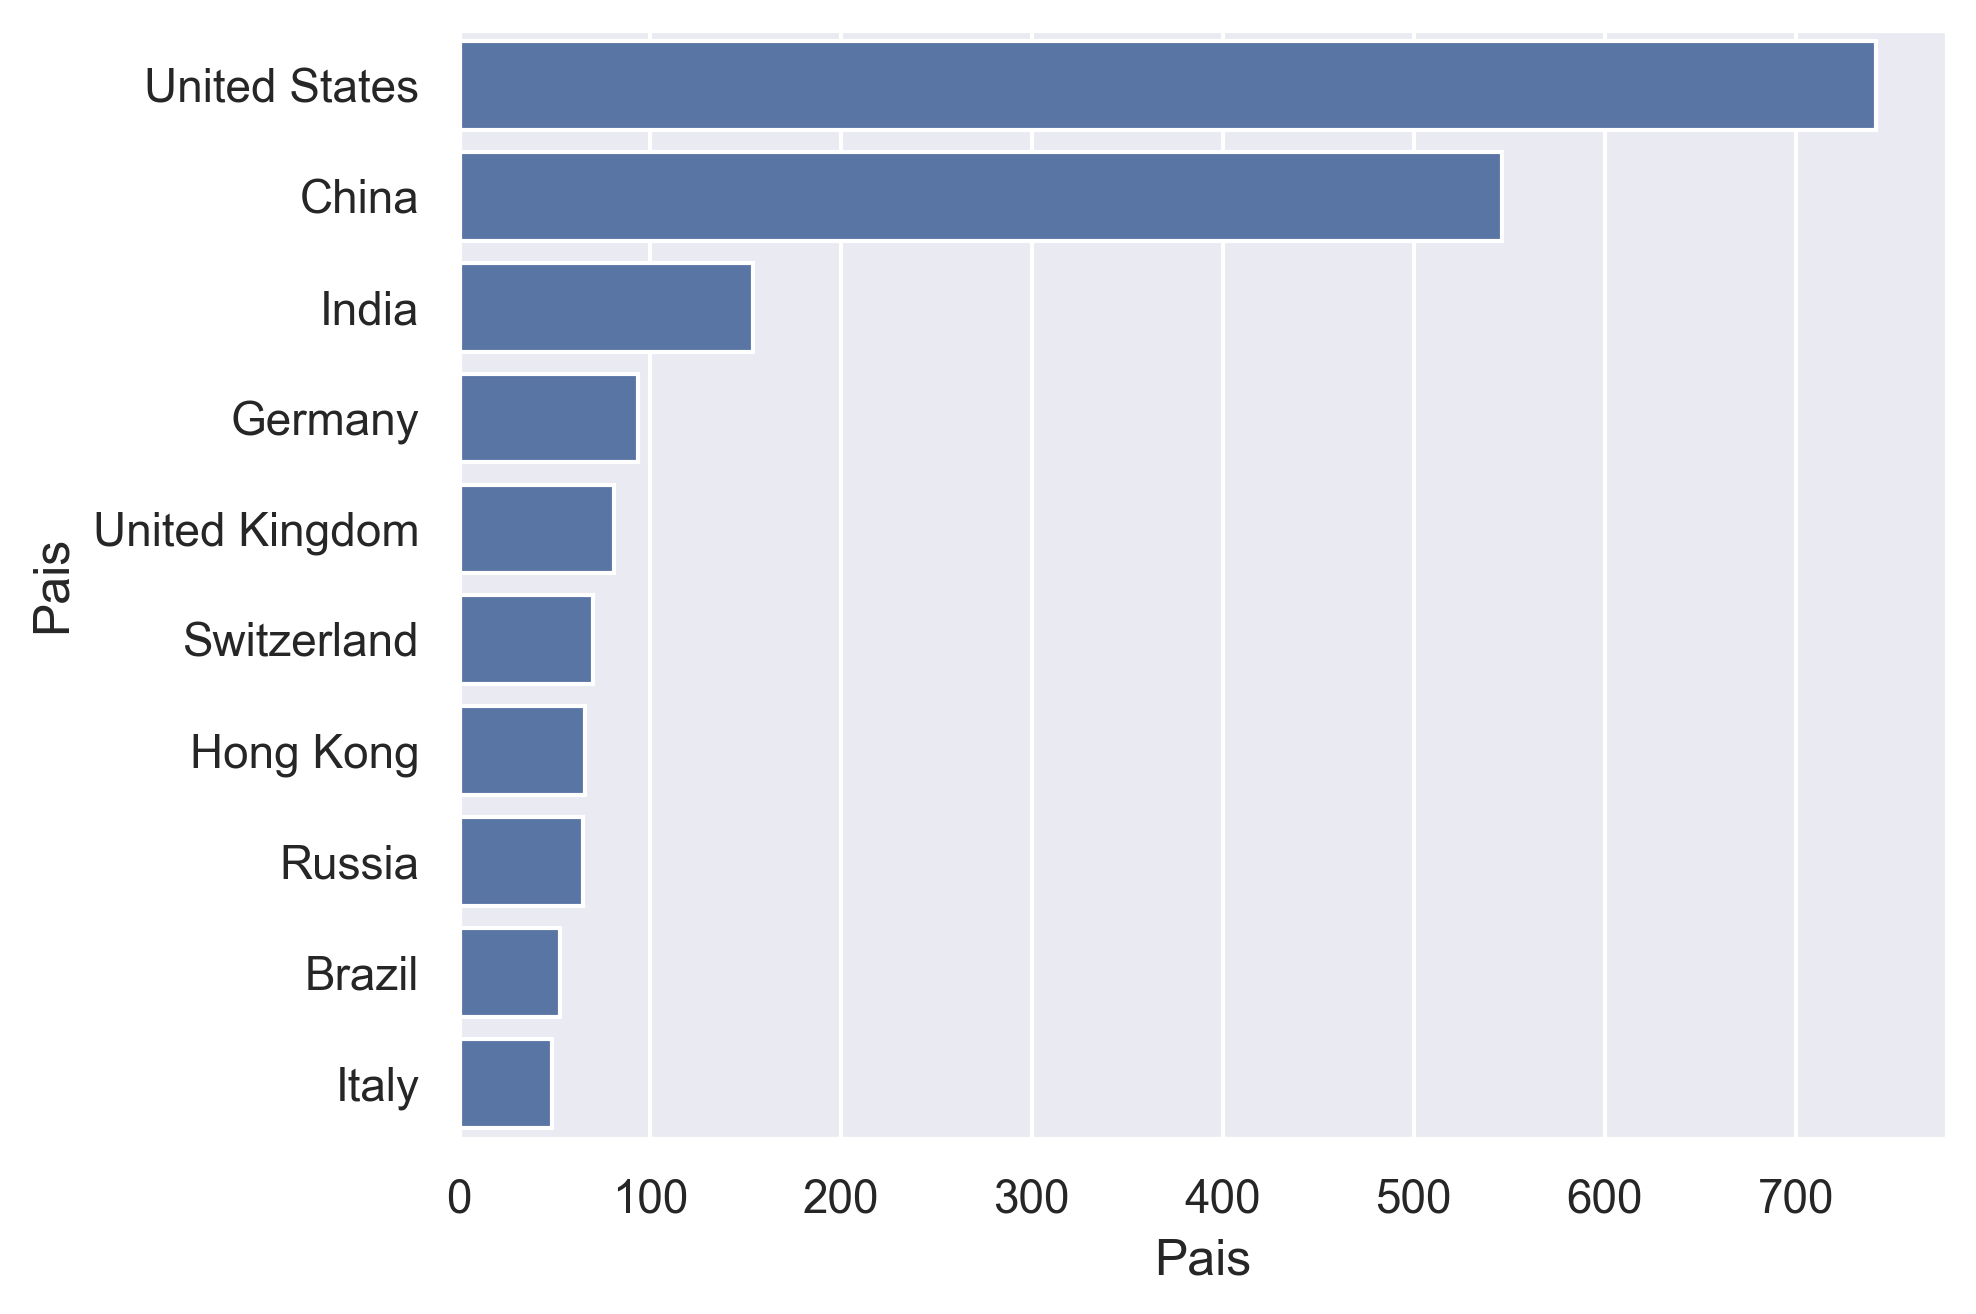

In [44]:
sns.barplot(x = df_ulke_sayi["Pais"][:10] , y = df_ulke_sayi.index[:10])